#### Importing necessary liberaries.

In [1]:
from selenium import webdriver
from bs4 import BeautifulSoup
import re
import time
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#### taking the twitter url as input.

In [78]:
url = input('paste the twitter url here: ') # paste the url copied from comments page on twitter.

#### asking user for the number of comments to be processed

In [79]:
num = int(input('Enter the number of comments to process: '))

#### initializing the chrome driver to be used by Selenium

In [53]:
driver = webdriver.Chrome()

#### defining a function that scrolls down the page for more comments

In [54]:
def scroll(n):
    t,i = 1, 1
    while(i<n):
        driver.execute_script("window.scrollBy(0, 5000);") # scrolls down the page on selenium chrome window
        print(" --------- please wait ---------  ")
        time.sleep(3) # please increase or decrease the timer value according to the internet speed.
        t+=1

        html = driver.page_source # collecting the HTML response from driver page
        soupeddata = BeautifulSoup(html, "html.parser") # initializing bs4 object with 'html.parser' property
        tw_links = soupeddata.find_all("li", class_ = "ThreadedConversation--loneTweet") # reading the data from HTML page
        
        i = len(tw_links)
    print('completed!!')
    return tw_links

#### passing the url request to driver and gathering page's response

In [55]:
driver.get(url) # Requesting a get response from the url page on driver

tw_links = scroll(num) # the function returns the data from the page

 --------- please wait ---------  
completed!!


In [56]:
total = len(tw_links)
if(total > num):
    total = num
    tw_links = tw_links[:num] # selecting the first required number of objects(comments)

#### Reading the HTML response for collecting the comments and using RegEx to remove unwanted comments

In [57]:
pattern = r"twitter.com"  # defining a pattern to look for in the comments
r = []
for x in tw_links:
    ep = x.find("p", class_ = "TweetTextSize") # gathering comments from the html objects(flags, classes)
    text = ep.text.strip()  # stripping out the text data
    d = re.findall(pattern, text)  # using RegEx to filter out the unwanted comments like images/videos and links
    if len(d):
        continue
    r.append(text)

#### using Sentiment Intensity Analyzer object for detecting the 'polarity scores' of the comments

In [59]:
sid = SentimentIntensityAnalyzer() # creating Sentiment Intensity Analyzer object

In [60]:
pol = []
po = []
for a in r:
    score = sid.polarity_scores(a) # checking for polarity score of each comment. the polarity score defines how positive, negative or neutral the comment is.
    comp = score['compound']
    neg = score['neg']
    pos = score['pos']
    neu = score['neu']
    if(comp >= 0):
        if(pos >= neu - 0.1): # manually choosing the threshold value for classifying positive and negative comments
            pol.append('positive')
        else:
            pol.append('negative')
    else:
        pol.append('negative')
    po.append(score) # stores the table of pos, neg, neu, comp score values. Can be printed using the commented line below
# print(po)

#### classifying the positive, negative and unprocessed comments

In [61]:
pos_num, neg_num = 0,0
for e in pol:
    if e == 'positive':
        pos_num += 1
    elif e == 'negative':
        neg_num += 1
unprocessed = total - (pos_num + neg_num) # calculating the unprocessed comments

In [62]:
labels = 'Positive', 'Unprocessed', 'Negative'  # prepairing data for plotting
data = [pos_num, unprocessed, neg_num]

#### printing the comments

In [77]:
for i,k in enumerate(r): # r is the list that stores the comments
    print (i+1,': ',k)

1 :  ....what do you know about boxing, you can’t even win a round with EU dictators, sparring is not your best asset, come to think of it what are you good at, oh yeah spinning a yarn!
2 :  Resign!
3 :  Must be great to meet well fed children now when will you visit and meet with children who are not so lucky to be so well fed?
4 :  For the good of the country will you please resign.
5 :  RESIGN YOU DELUSIONAL SOCIAPATH
6 :  RESIGN
7 :  Resign.  #WTOBrexit #NoBrexitNoVote
8 :  A spar with her would've gone down well.
9 :  Maybe you can get Huawei to sponsor
10 :  TM resign
11 :  Liar
12 :  Resign


In [72]:
for i,k in enumerate(labels):
    print (k,': ',data[i])

Positive :  0
Unprocessed :  1
Negative :  12


#### pie-chart representation of the comments

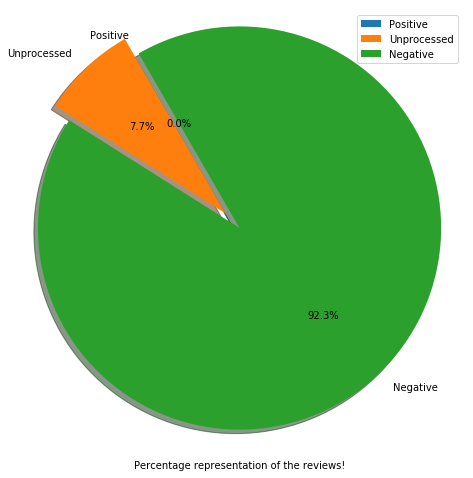

In [76]:
explode = (0, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Unprocessed')

fig1, ax1 = plt.subplots(figsize = (8, 8))
ax1.pie(data, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=120)
plt.xlabel("\nPercentage representation of the comments!")
plt.legend(labels)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()